In [1]:
# Course: INF 2178: Experimental Design For Data Science
# Name: Charlie Zhang
# Student number：1009855514
# Instructor: Shion Guha
# Program: Master of Information
# University of Toronto
# Assignment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=fca9ee1d9d019164c87c31cb80eb4e72e00e755f3ae6f6c3380d12c0e1396e33
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [3]:
# Load the dataset
dt = pd.read_excel('INF2178_A2_data.xlsx')

dt_copy = dt.copy() # Prepare for a copy of original data to keep it untouched

# Display the dataset
dt.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [4]:
# Dataset summary and data type check
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [5]:
# Check distinct values
dt.nunique()

_id            1063
LOC_ID         1063
LOC_NAME       1058
AUSPICE           3
ADDRESS        1032
PCODE           998
ward             25
bldg_type        30
BLDGNAME        691
IGSPACE          12
TGSPACE          40
PGSPACE          64
KGSPACE          40
SGSPACE          53
TOTSPACE        188
subsidy           2
cwelcc_flag       2
dtype: int64

In [6]:
dt.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


# **EDA**#

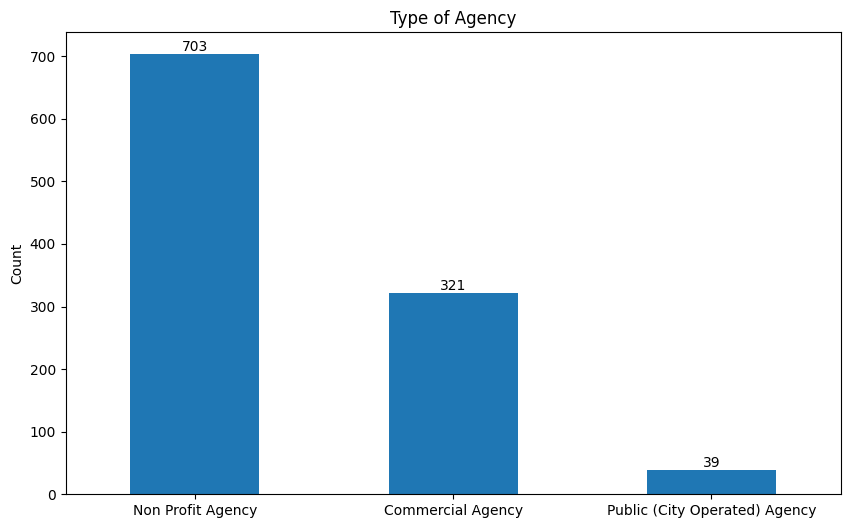

In [7]:
# Setting the size of the figure
plt.figure(figsize = (10,6))

# Capture the counts of unique values in the 'AUSPICE' column, and selecting the top 3
capacityType = dt['AUSPICE'].value_counts().nlargest(3)

# Plot a bar chart with green color
capacityType.plot(kind='bar')

# Setting titles and labels
plt.title('Type of Agency')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the count on top of each bar
for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

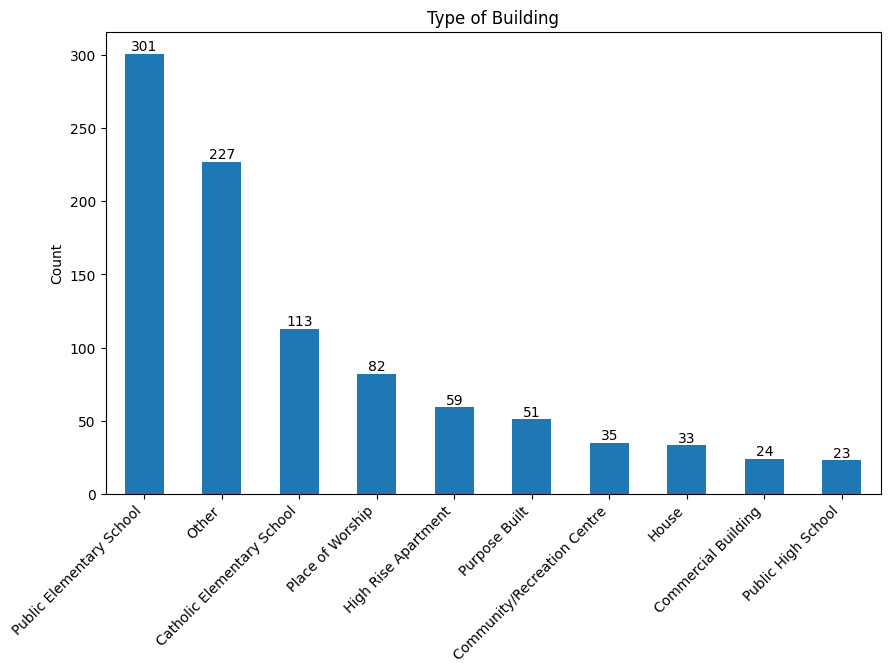

In [8]:
# Select the top 10 of unique values in the 'bldg_type' column
capacityType = dt['bldg_type'].value_counts().nlargest(10)

# Plot a bar chart with sky blue color
plt.figure(figsize = (10,6))
capacityType.plot(kind='bar')

# Setting titles and labels
plt.title('Type of Building')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

# Display the count on top of each bar
for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

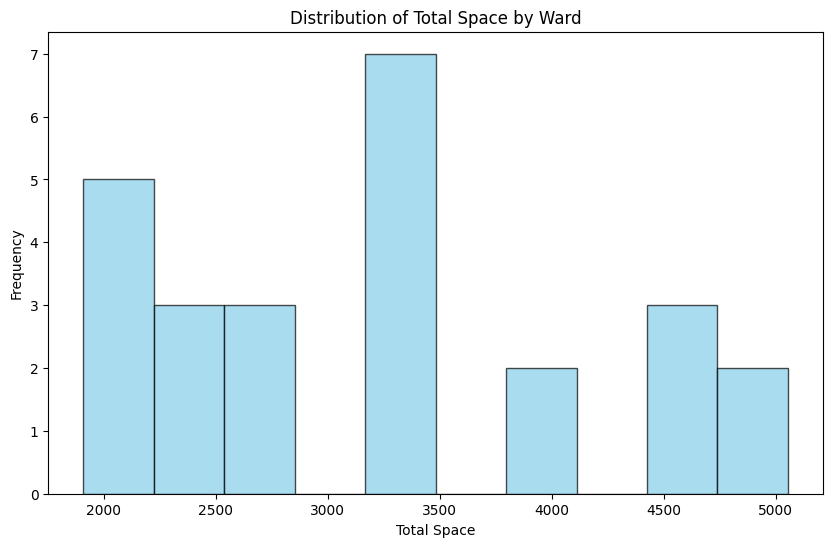

In [9]:
# Sum of Total space for each Ward
total_ward = dt.groupby("ward")["TOTSPACE"].sum().reset_index()
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_ward["TOTSPACE"], bins=10, color="skyblue", edgecolor='black', alpha=0.7)
plt.title("Distribution of Total Space by Ward")
plt.xlabel("Total Space")
plt.ylabel("Frequency")

# Show the plot
plt.show()

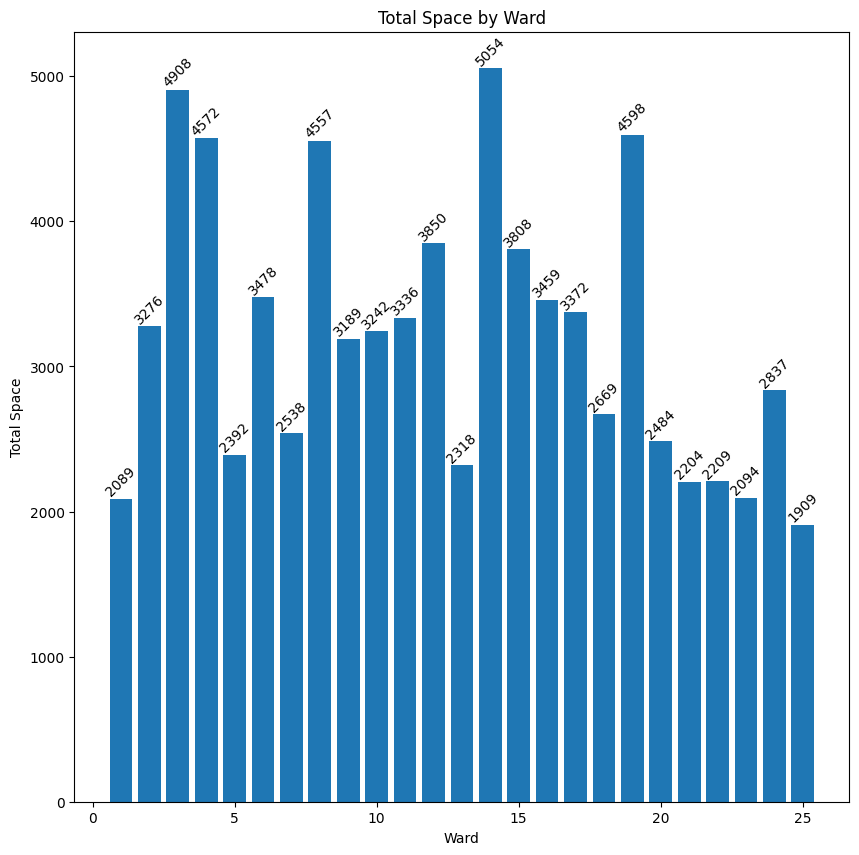

In [10]:
# Bargraph of Total Space for each Ward Code

# Sum of Total space of each Ward
total_ward = dt.groupby("ward")["TOTSPACE"].sum().reset_index()

# Plot the bar graph
plt.figure(figsize=(10,10))
bars = plt.bar(total_ward["ward"], total_ward["TOTSPACE"])
plt.title("Total Space by Ward")
plt.xlabel("Ward")
plt.ylabel("Total Space")

# Add numbers at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha="center", va="bottom", fontsize = 10,rotation = 45)

# Show the plot
plt.show()

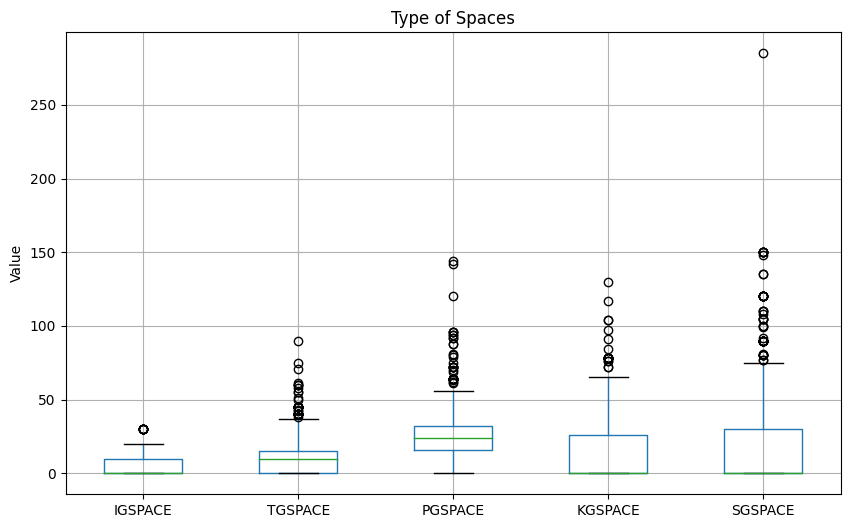

In [11]:
# Boxplot for type of spaces
plt.figure(figsize = (10,6))
dt.boxplot(column=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])

plt.title('Type of Spaces')
plt.ylabel('Value')

plt.show()

In [12]:
# Grouping the child care center's by 'LOC_NAME' column
groups = dt.groupby('LOC_NAME')

# Print groups with the same value
for value, group in groups:
    if len(group) > 1:
        print(f"The value same as 'LOC_NAME' is:   {value}: {list(group.index)}")

The value same as 'LOC_NAME' is:   Atelier Kids Inc.: [952, 1005]
The value same as 'LOC_NAME' is:   Blue Bell Academy Inc.: [859, 1025]
The value same as 'LOC_NAME' is:   Bumble Bee Academy: [888, 997]
The value same as 'LOC_NAME' is:   Kinder College Early Learning Centre: [698, 1030]
The value same as 'LOC_NAME' is:   Westside Montessori School: [682, 1006]


In [13]:
dt1 = dt
# Add 'totalCapacity' column
dt1['totalCapacity'] = dt.groupby('LOC_NAME')['TOTSPACE'].transform('sum')

# Print the resulting
dt1.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,totalCapacity
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,164
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,83
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,102
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,65
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,26


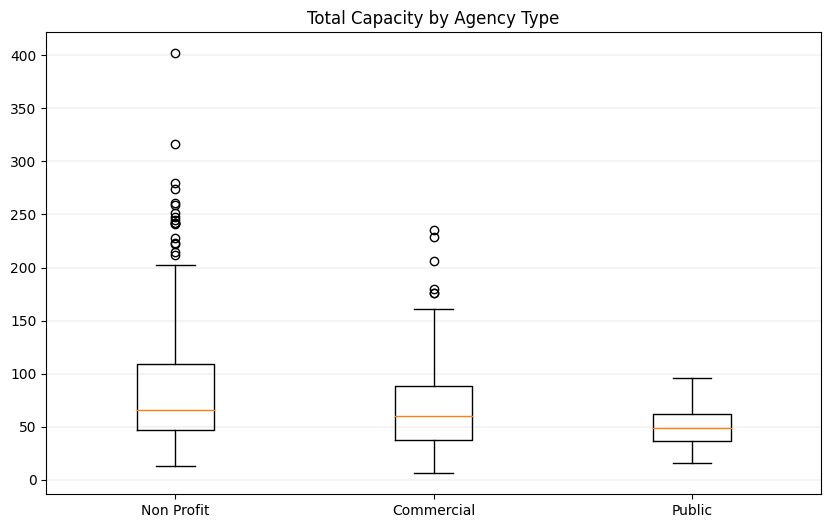

In [14]:
# Extract categories from the 'Auspice' column
auspice_NonProfit = dt1[dt1['AUSPICE'] == 'Non Profit Agency']['totalCapacity']
auspice_Commercial = dt1[dt1['AUSPICE'] == 'Commercial Agency']['totalCapacity']
auspice_Public = dt1[dt1['AUSPICE'] == 'Public (City Operated) Agency']['totalCapacity']

# Merge them in one dataset
dt_merge = [auspice_NonProfit.dropna(), auspice_Commercial.dropna(), auspice_Public.dropna()]

# Boxplot for different program models
plt.subplots(figsize=(10, 6))
plt.title('Total Capacity by Agency Type')
labels = ['Non Profit', 'Commercial', 'Public']

# Add reference lines for x-axis
plt.grid(color='grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

plt.boxplot(dt_merge, labels=labels)
plt.show()

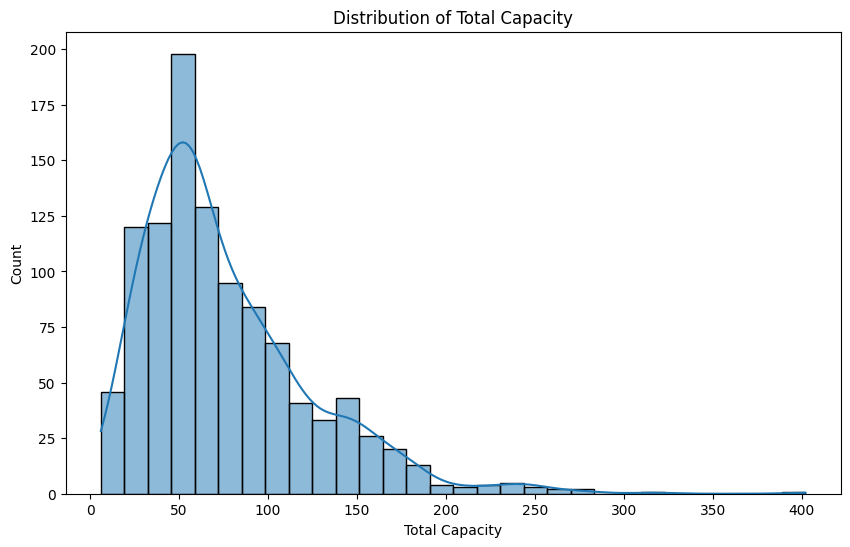

In [15]:
# Distribution of Total Capacity
plt.figure(figsize=(10, 6))
sns.histplot(dt1['totalCapacity'], bins=30, kde=True)
plt.title('Distribution of Total Capacity')
plt.xlabel('Total Capacity')
plt.ylabel('Count')
plt.show()

In [16]:
# Count the occurrences of each unique value in 'subsidy' column
subsidy_counts = dt['subsidy'].value_counts()

# Create a new DataFrame for counts
subsidy_counts = pd.DataFrame(subsidy_counts).reset_index()

# Rename the columns
subsidy_counts.columns = ['Subsidy', 'Count']

# Display the table
subsidy_counts

,Subsidy,Count
0,Y,718
1,N,345


In [17]:
# Summary statistics For "Total Capacity"
summary_stats = dt1['totalCapacity'].describe()

# Print the summary statistics
print('Summary statistics For "Total Capacity":')
print(summary_stats)

# Calculate Interquartile Range (IQR)
iqr = summary_stats['75%'] - summary_stats['25%']
print('Interquartile Range (IQR):', iqr)


Summary statistics For "Total Capacity":
count    1063.000000
mean       76.219191
std        48.019495
min         6.000000
25%        43.000000
50%        62.000000
75%        99.000000
max       402.000000
Name: totalCapacity, dtype: float64
Interquartile Range (IQR): 56.0


In [18]:
# Calculate the mean for 'totalCapacity' as of 'Auspice'
mean_by_auspice = dt1.groupby('AUSPICE')['totalCapacity'].mean()

# Print the result
print('Mean of "totalCapacity" based on "Auspice":')
print(mean_by_auspice)

Mean of "totalCapacity" based on "Auspice":
AUSPICE
Commercial Agency                66.788162
Non Profit Agency                82.103841
Public (City Operated) Agency    47.769231
Name: totalCapacity, dtype: float64


#**One-way ANOVA**#

Null Hypothesis (H0): There is no difference in total child care center capacity based on the operating auspice.

Alternative Hypothesis (H1): There is a difference in total child care center capacity based on the operating auspice.

In [19]:
columns_keep = ['_id','AUSPICE','totalCapacity']
dt_melt = dt1[columns_keep].copy()

# Convert 'totalCapacity' to numeric
dt_melt['totalCapacity'] = pd.to_numeric(dt_melt['totalCapacity'], errors='coerce')

# reshape the dataframe suitable for statsmodels package
dt_melt = pd.melt(dt_melt.reset_index(), id_vars=['_id', 'AUSPICE'], value_vars=['totalCapacity'])

# replace column names
dt_melt.columns = ['_id', 'AUSPICE', 'variable','totalCapacity']

# Drop the 'variable' column
dt_melt = dt_melt.drop('variable', axis=1)

# Convert 'AUSPICE' to categorical
dt_melt['AUSPICE'] = pd.Categorical(dt_melt['AUSPICE'])

dt_melt.head()

,_id,AUSPICE,totalCapacity
0,1,Non Profit Agency,164
1,2,Non Profit Agency,83
2,3,Non Profit Agency,102
3,4,Non Profit Agency,65
4,5,Non Profit Agency,26


In [20]:
# Ordinary Least Squares (OLS) model
# Fit a linear regression model where 'totalCapacity' is the dependent variable and 'AUSPICE' is a categorical independent variable

model = ols('totalCapacity ~ C(AUSPICE)', data=dt1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.446199e+04,2.0,18.933069,8.335502e-09
Residual,2.364374e+06,1060.0,NaN,NaN


In [21]:
# Perform the anova analysis
res = stat()
res.anova_stat(df=dt_melt, res_var='totalCapacity', anova_model='totalCapacity ~ AUSPICE')

# Round or replace p-values
res.anova_summary["PR(>F)"] = res.anova_summary["PR(>F)"].apply(lambda x: "<0.001" if x < 0.001 else round(x, 3))

# Round other columns in the summary table to 2
res.anova_summary = res.anova_summary.round(3)
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
AUSPICE,2.0,84461.991,42230.995,18.933,<0.001
Residual,1060.0,2364373.938,2230.541,NaN,NaN


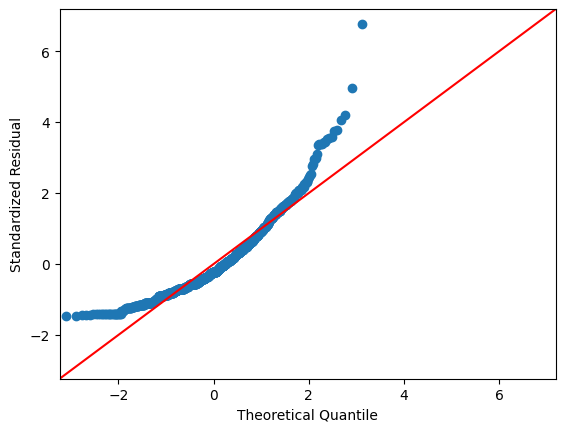

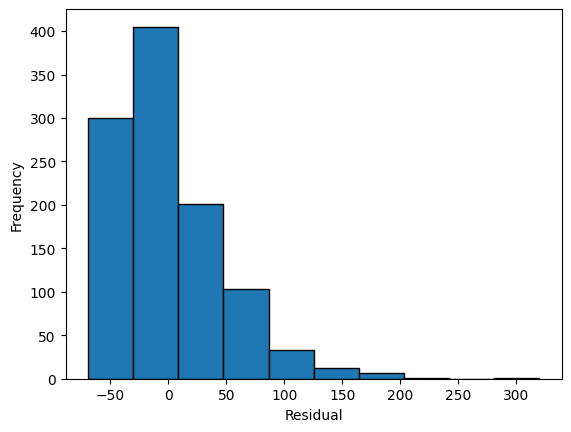

In [22]:
# assumption check
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantile")
plt.ylabel("Standardized Residual")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, histtype='bar', ec='k')
plt.xlabel("Residual")
plt.ylabel('Frequency')
plt.show()

In [23]:
# Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)

# DataFrame to display the results
result_df = pd.DataFrame({
    'Test Statistic': [round(w,5)],
    'p-value': ['<0.001' if pvalue < 0.001 else round(pvalue, 3)]
})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
result_df


Shapiro-Wilk test for normality:


,Test Statistic,p-value
0,0.90279,<0.001


In [24]:
#Levene's test when the sample is not normally distributed
res.levene(df=dt_melt, res_var='totalCapacity', xfac_var='AUSPICE')
res.levene_summary['Value'] = res.levene_summary['Value'].apply(lambda x: '< 0.001' if float(x) == 0.0 else f'{float(x):.5f}')
res.levene_summary

,Parameter,Value
0,Test statistics (W),15.79710
1,Degrees of freedom (Df),2.00000
2,p value,< 0.001


In [25]:
# Using Tukey's HSD for post-hoc test
res = pairwise_tukeyhsd(dt_melt['totalCapacity'], dt_melt['AUSPICE'])
auspice_posthoc_summary = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])

# displayp-adj instead of 0
auspice_posthoc_summary['p-adj'] = auspice_posthoc_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) == 0.0 else f'{float(x):.3f}')

# Display the result
auspice_posthoc_summary.round(4)

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Commercial Agency,Non Profit Agency,15.3157,< 0.001,7.8488,22.7826,True
1,Commercial Agency,Public (City Operated) Agency,-19.0189,0.047,-37.8158,-0.2221,True
2,Non Profit Agency,Public (City Operated) Agency,-34.3346,< 0.001,-52.5698,-16.0994,True


#**Two-way ANOVA**#
Null Hypothesis (H0): The total capacity of a child care center does not differ by ward and subsidy status.

Alternative Hypothesis (H1): The total capacity of a child care center differs by ward and subsidy status.

In [39]:
# Perform two-way ANOVA
model_formula = 'TOTSPACE ~ C(ward) + C(subsidy) + C(ward):C(subsidy)'
model = ols(model_formula, data=dt1).fit()
two_anova_table = sm.stats.anova_lm(model, typ=2)

# Add mean_sq column to the ANOVA table
two_anova_table['mean_sq'] = two_anova_table['sum_sq'] / anova_table['df']

# Format PR(>F) values
two_anova_table['PR(>F)'] = two_anova_table['PR(>F)'].apply(lambda x: '< 0.001' if x < 0.001 else round(x, 3))

# Round the other values to two decimal places and print the result
two_anova_table = two_anova_table.round(2)
two_anova_table


,sum_sq,df,F,PR(>F),mean_sq
C(ward),145685.34,24.0,2.98,< 0.001,NaN
C(subsidy),227852.67,1.0,111.72,< 0.001,NaN
C(ward):C(subsidy),55644.00,24.0,1.14,0.295,NaN
Residual,2066082.64,1013.0,NaN,NaN,1949.13


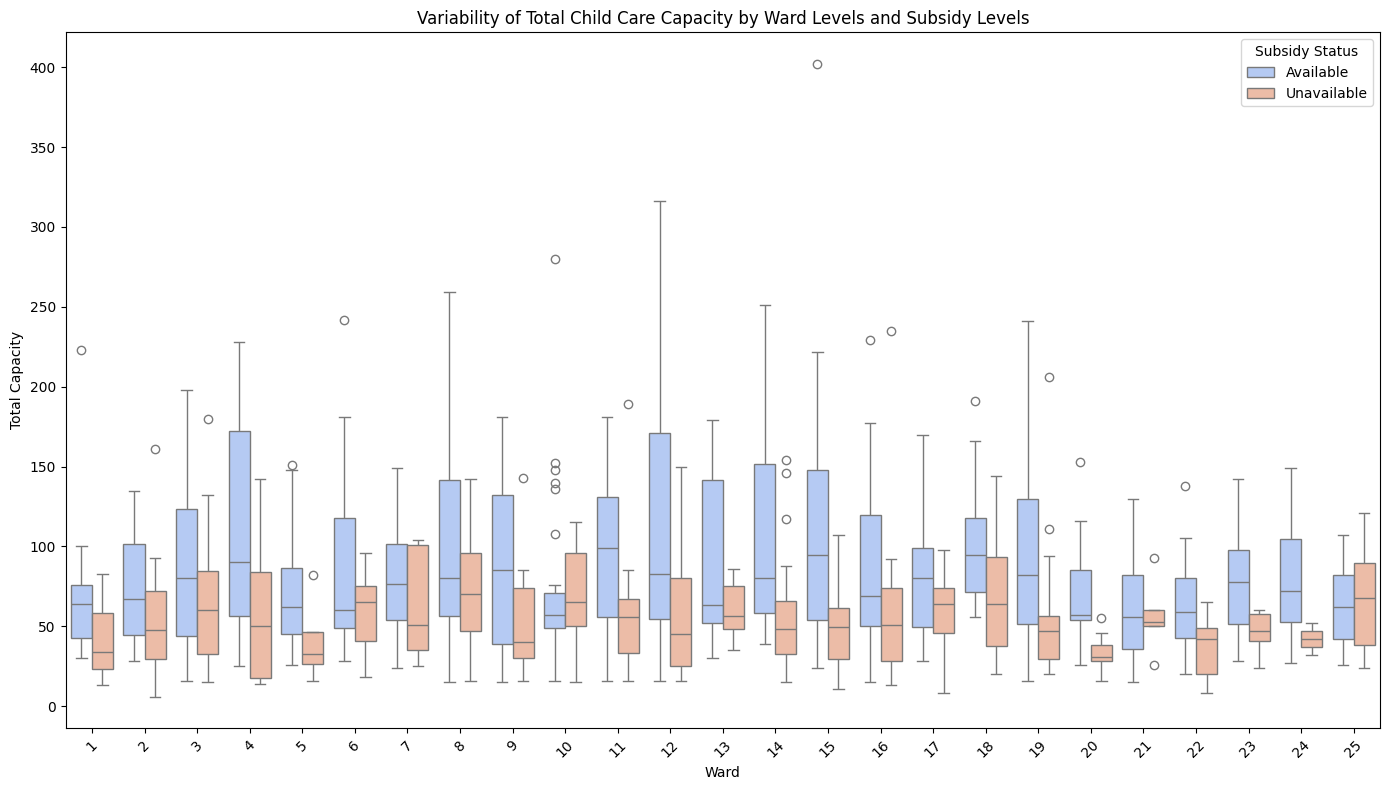

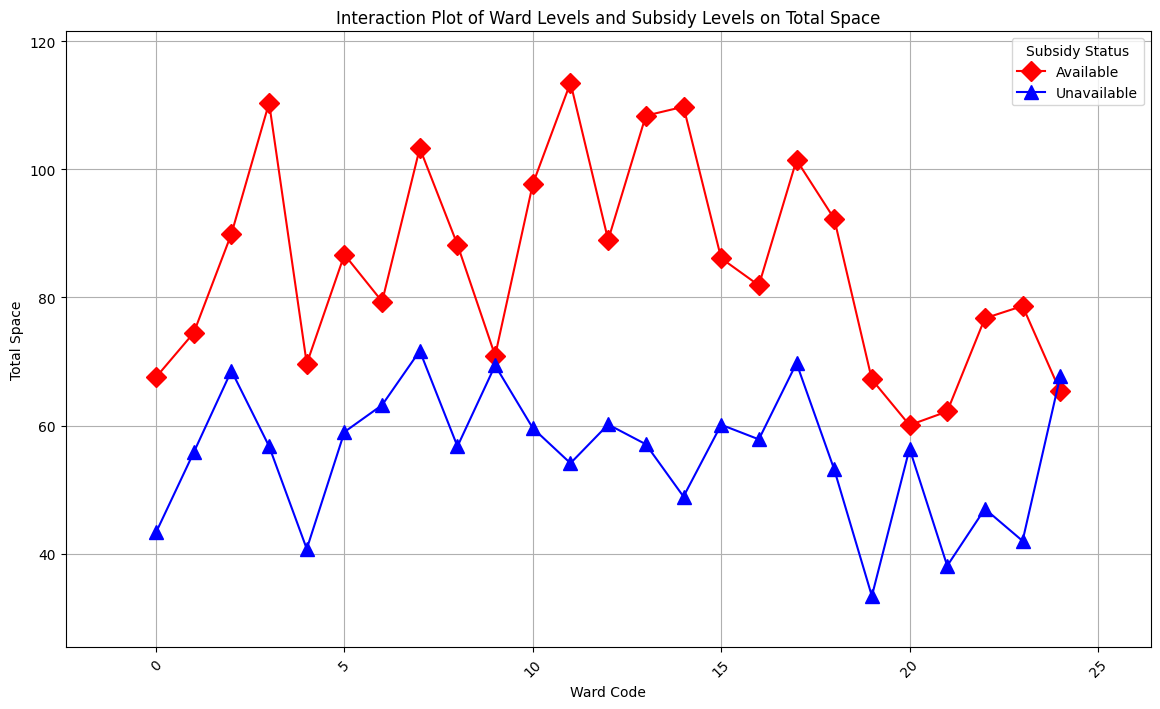

In [27]:

# Rename 'subsidy' column values for clarity
dt1['Subsidy'] = dt1['subsidy'].map({'Y': 'Available', 'N': 'Unavailable'})

# Visualization 1: Boxplot for Total Capacity by Ward and Subsidy Levels
plt.figure(figsize=(14, 8))
sns.boxplot(x='ward', y='TOTSPACE', hue='Subsidy', data=dt1, palette='coolwarm')
plt.title('Variability of Total Child Care Capacity by Ward Levels and Subsidy Levels')
plt.xlabel('Ward')
plt.ylabel('Total Capacity')
plt.xticks(rotation=45)
plt.legend(title='Subsidy Status')

plt.tight_layout()
plt.show()

# Preparing data for the interaction plot
# Interaction plots require numerical data for the x-axis, so we use the 'ward' as is.
interaction_data = dt1.copy()
interaction_data['ward'] = interaction_data['ward'].astype('category').cat.codes

# Visualization 2: Interaction Plot for Total Capacity by Ward and Subsidy Levels
fig, ax = plt.subplots(figsize=(14, 8))
interaction_plot(x=interaction_data['ward'], trace=interaction_data['Subsidy'], response=interaction_data['TOTSPACE'],
                 colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
plt.title('Interaction Plot of Ward Levels and Subsidy Levels on Total Space')
plt.xlabel('Ward Code')
plt.ylabel('Total Space')
plt.xticks(rotation=45)
plt.legend(title='Subsidy Status')
plt.grid(True)

plt.show()

In [28]:
# Testing assumption 1 using Shapiro-Wilk Test
w, pvalue = stats.shapiro(model.resid)
shapiro_test = pd.DataFrame({'Parameter': ['Test Statistic', 'p-value'], 'Value': [round(w, 5), '<0.001' if pvalue < 0.001 else round(pvalue, 3)]})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
shapiro_test


Shapiro-Wilk test for normality:


,Parameter,Value
0,Test Statistic,0.93512
1,p-value,<0.001


In [33]:
ward_subsidy = dt1[['ward', 'subsidy', 'TOTSPACE']].copy()
ward_subsidy.reset_index(drop=True, inplace=True)
ward_subsidy['Subsidy'] = ward_subsidy['subsidy'].replace({'Y': 'Available', 'N': 'Unavailable'})
ward_subsidy['Ward'] = ward_subsidy['ward'].astype('int64')
ward_subsidy

,ward,subsidy,TOTSPACE,Subsidy,Ward
0,3,Y,164,Available,3
1,8,Y,83,Available,8
2,25,Y,102,Available,25
3,10,Y,65,Available,10
4,20,Y,26,Available,20
...,...,...,...,...,...
1058,6,Y,112,Available,6
1059,15,N,60,Unavailable,15
1060,13,N,49,Unavailable,13
1061,8,Y,56,Available,8


In [38]:
# assumption 2: samples are of equal variance (using Levene's Test)
res = stat()
res.levene(df=ward_subsidy, res_var='TOTSPACE', xfac_var=['ward', 'subsidy'])

# Round the summary table to two decimal places, but handle p-values less than 0.001
res.levene_summary['Value'] = res.levene_summary['Value'].apply(lambda x: '< 0.001' if x == 0.0 else round(x, 4))
res.levene_summary


,Parameter,Value
0,Test statistics (W),3.024
1,Degrees of freedom (Df),49.0
2,p value,< 0.001
